In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
os.chdir("//Users//moghalaimanfathima//Downloads")
df= pd.read_csv("train.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
# Fill missing values in 'Age' with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop the 'Cabin' column
df.drop(columns=['Cabin'], inplace=True)

# Fill missing values in 'Embarked' with the most common port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/var/folders/kn/zghxkzzs13j87qt881fkmqzm0000gn/T/ipykernel_38407/3425228109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/kn/zghxkzzs13j87qt881fkmqzm0000gn/T/ipykernel_38407/3425228109.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [14]:
# Convert 'Sex' into numerical format
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [16]:
# Create a new feature 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Drop columns that won't be used
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)


In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale 'Age' and 'Fare'
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Display the first few rows of the prepared dataset
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize
0,0,3,0,-0.565736,1,0,-0.502445,False,True,2
1,1,1,1,0.663861,1,0,0.786845,False,False,2
2,1,3,1,-0.258337,0,0,-0.488854,False,True,1
3,1,1,1,0.433312,1,0,0.420730,False,True,2
4,0,3,0,0.433312,0,0,-0.486337,False,True,1


/var/folders/kn/zghxkzzs13j87qt881fkmqzm0000gn/T/ipykernel_38407/143655145.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ci=None)


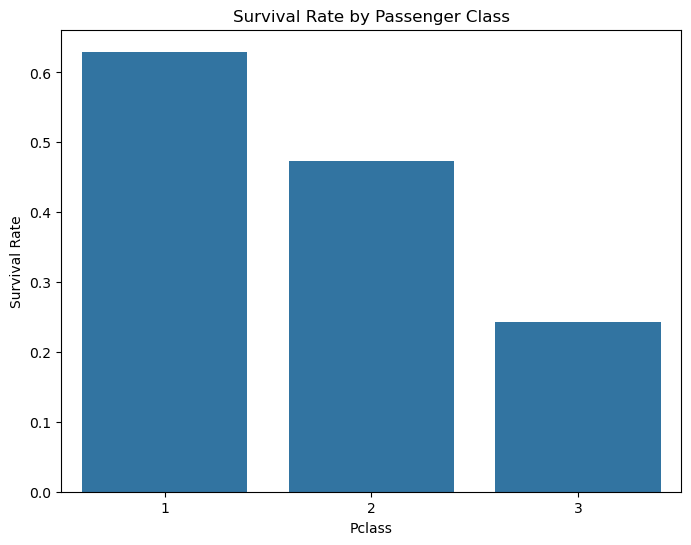

In [18]:
# Survival rate by passenger class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()


/var/folders/kn/zghxkzzs13j87qt881fkmqzm0000gn/T/ipykernel_38407/3094104615.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None)


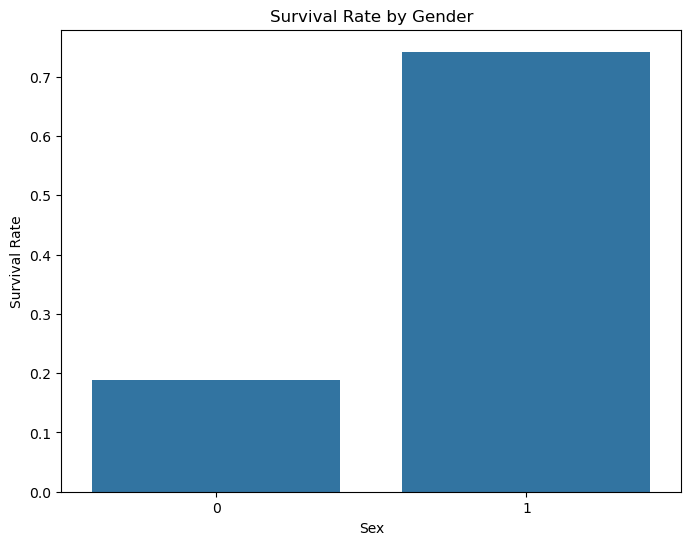

In [19]:
# Survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()


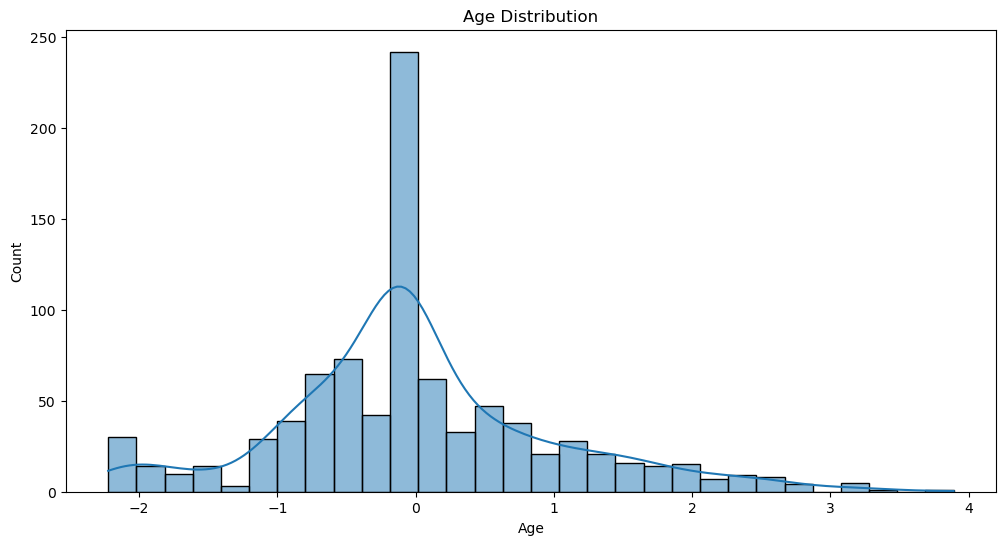

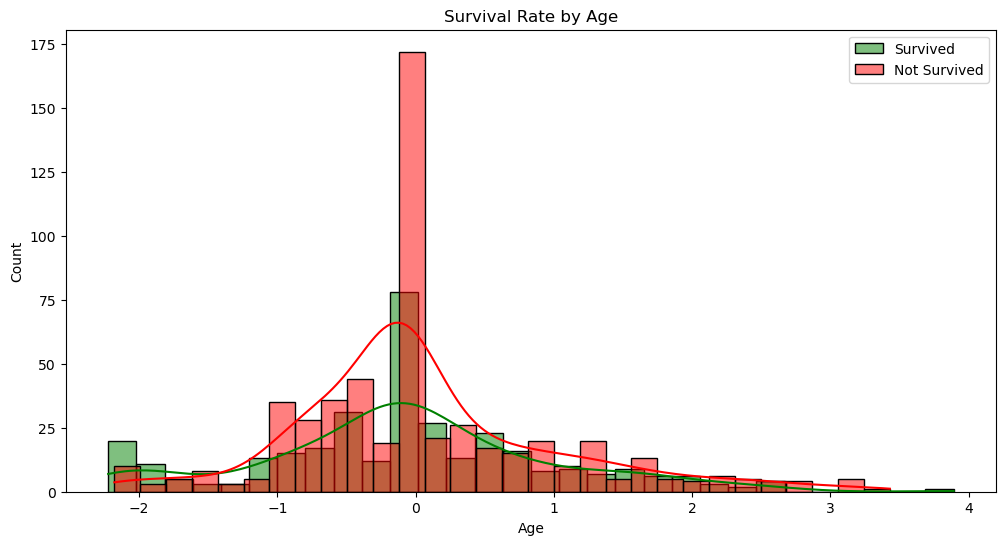

In [20]:
# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Survival rate by age
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Not Survived')
plt.legend()
plt.title('Survival Rate by Age')
plt.show()
